In [85]:
# NN Ensembling

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:,0:393].values
y = dataset.iloc[:,393].values

In [86]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [87]:
# Splitting the dataset into the training set and validation set 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# number of classes
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)

In [88]:
# Importing the Keras libraries and packages 
import keras 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf 

# Initilising the ANN
classifier = Sequential()

# Adding the input layer and first hidden layer
classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu', input_dim = 393))

# Adding the output layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))

classifier.summary()

# Compiling the ANN
#adam_1 = keras.optimizers.Adam(lr=0.001)
adam_1 = tf.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(optimizer = adam_1, loss= 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set 
train_history = classifier.fit( X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=32)


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 200)               78800     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2010      
Total params: 80,810
Trainable params: 80,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.8844 - accuracy: 0.7138 - val_loss: 0.5995 - val_accuracy: 0.8208
Epoch 2/100
750/750 [==============================] - 1s 819us/step - loss: 0.5060 - accuracy: 0.8417 - val_loss: 0.4910 - val_accuracy: 0.8485
Epoch 3/100
750/750 [==============================] - 1s 788us/step - loss: 0.4052 - accuracy: 0.8714 - val_loss: 0.4785 - val_accuracy: 0.8517
Epoch 4/100
750/750 [==============================] - 1s 798us/step - loss: 0

750/750 [==============================] - 1s 837us/step - loss: 0.0519 - accuracy: 0.9822 - val_loss: 0.9956 - val_accuracy: 0.8703
Epoch 54/100
750/750 [==============================] - 1s 850us/step - loss: 0.0468 - accuracy: 0.9845 - val_loss: 0.9941 - val_accuracy: 0.8712
Epoch 55/100
750/750 [==============================] - 1s 895us/step - loss: 0.0494 - accuracy: 0.9826 - val_loss: 0.9986 - val_accuracy: 0.8767
Epoch 56/100
750/750 [==============================] - 1s 779us/step - loss: 0.0495 - accuracy: 0.9835 - val_loss: 1.0111 - val_accuracy: 0.8767
Epoch 57/100
750/750 [==============================] - 1s 841us/step - loss: 0.0520 - accuracy: 0.9825 - val_loss: 1.0140 - val_accuracy: 0.8770
Epoch 58/100
750/750 [==============================] - 1s 787us/step - loss: 0.0419 - accuracy: 0.9856 - val_loss: 1.0121 - val_accuracy: 0.8795
Epoch 59/100
750/750 [==============================] - 1s 799us/step - loss: 0.0439 - accuracy: 0.9843 - val_loss: 1.0634 - val_accuracy

In [91]:
# accuracy plot and loss plot
def show_train_history(train_history):
    
    acc = train_history.history['accuracy']
    val_acc = train_history.history['val_accuracy']
    loss = train_history.history['loss']
    val_loss = train_history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    fig , ax = plt.subplots()                  
    fig.subplots_adjust(wspace=0.3)             
    fig.set_figwidth(14)                       

    ax1 = plt.subplot(1, 2, 1)
    plt.title("Accuracy")
    plt.plot(epochs,train_history.history['accuracy'],'-', label='accuracy')
    plt.plot(epochs,train_history.history['val_accuracy'],'-',  label='val_accuracy')
    leg = ax1.legend(loc='lower right') 
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')

    ax2 = plt.subplot(1, 2, 2)
    plt.title("Loss")
    plt.plot(epochs,train_history.history['loss'],'-', label='loss')
    plt.plot(epochs,train_history.history['val_loss'],'-', label='val_loss')
    leg = ax2.legend(loc='upper right') 
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.show()

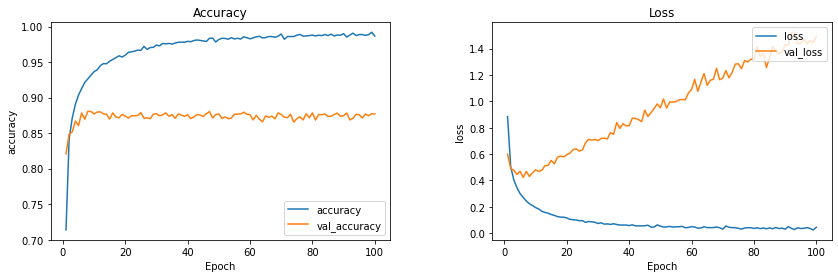

In [93]:
# monitor the staatus of the training
show_train_history(train_history)